# Python Practical Design <font size=4>© Enos Chou</font>

<b>Cases</b><br>
<ol>
    <li><a href="#api">Open Data API Integration</a>
    <li><a href="#cra">Basic Crawler Integration</a>
    <li><a href="#int">Integrity Consideration</a>
    <li><a href="#mod">Modularization for Delivery</a>
    <li><a href="#opt">Optimize Function Design to Improve Performance</a>
    <li><a href="#par">Parallel Run to Improve Performance</a>
    <li><a href="#wlb">Weather LINE Bot</a>
    <li><a href="#wap">Weather API</a>
    <li><a href="#con">Configurable Code Design</a>
</ol>

## <div id="api"><font color="blue">1. Open Data API Integration</font></div>

### <font color="brown">以中央氣象屬之 Open Data API 實做查詢即時天氣模組</font>

<b>SPEC</b>

<tt>
def grab(site):<br>
&nbsp;&nbsp;&nbsp; ...<br>
&nbsp;&nbsp;&nbsp; return {'S': '臺北', 'T': 25.3, 'H': 0.53, 'R': 0.5, 'O': '2024-08-02...'}<br>
</tt>

<b>Reference Output</b>

<tt>
print(grab('臺北'))<br>
<br>
{'S': '臺北', 'T': 35.7, 'H': 0.5, 'R': 0.0, 'O': '2024-08-02 14:20:00'}
</tt>

<b>Hints</b>

<ol>
    <tt>
    <li><font color="green">requests</font> to simulate http(s) request<br>
        <br>
        !pip install requests<br>
        <br>
        r = requests.get(url)<br>
        r.text<br>
        r.json()<br>
        <br>
    <li>improve the code’s fault tolerance
    </tt>
</ol>

## <div id="cra"><font color="blue">2. Basic Crawler Integration</font></div>

### <font color="brown">爬取中央氣象屬之氣象網站資訊實做查詢即時天氣模組</font>

<b>SPEC</b>

<tt>
def grab(site):<br>
&nbsp;&nbsp;&nbsp; ...<br>
&nbsp;&nbsp;&nbsp; return {'S': '臺北', 'T': 25.3, 'H': 0.53, 'R': 0.5, 'O': '08/02 ...'}<br>
</tt>

<b>Reference Output</b>

<tt>
print(grab('臺北'))<br>
<br>
{'S':, '臺北', 'T': 32.2, 'H': 0.64, 'R': 0.0, 'O': '08/02 15:00'}
</tt>

<b>Hints</b>

<ol>
    <tt>
    <li><font color="green">beautifulsoup4</font> for crawler<br>
        <br>
        !pip install bs4<br>
        <br>
        from bs4 import BeautifulSoup<br>
        <br>
        soup = BeautifulSoup(text, 'html.parser')<br>
        soup.find(headers="hum").text
        <br>
    </tt>
</ol>

## <div id="int"><font color="blue">3. Integrity Consideration</font></div>

### <font color="brown">整合上述兩種取得天氣資訊方式至同個模組，取得最佳結果</font>

<b>SPEC</b>

查詢 五峰站、西拉雅、合歡山頂、梅山、中央大學、北投 等測站都需正確輸出天氣資訊

<tt>
def grab(site, key=None):<br>
&nbsp;&nbsp;&nbsp; ...<br>
&nbsp;&nbsp;&nbsp; return {'S': '臺北', 'T': 25.3, 'H': 0.53, 'R': 0.5, 'O': '08/02 ...'}<br>
</tt>
<br>

<b>Notes</b>

兩種方式取得的氣象資訊可能不同，須取得最佳資訊

<b>Reference Output</b>

<tt>
sites = ['五峰站', '西拉雅', '合歡山頂', '梅山', '中央大學', '北投']<br>
for site in sites:<br>
&nbsp;&nbsp;&nbsp; print(site, grab(site, key='<i>YOUR_KEY</i>'))<br>
<br>
五峰站 {'S': 五峰站', T': 24.1, 'H': 0.96, 'O': '2024-08-02 15:50:00'}<br>
西拉雅 {'S': 西拉雅','T': 32.7, 'H': 0.63, 'O': '2024-08-02 15:50:00'}<br>
合歡山頂 {'S': 合歡山頂', 'T': 14.3, 'H': 0.95, 'R': 0.0, 'O': '08/02 15:00'}<br>
梅山 {'S': 梅山', 'T': 32.2, 'H': 0.64, 'R': 0.0, 'O': '08/02 15:00'}<br>
中央大學 {'S': 中央大學', 'T': 26.4, 'H': 0.37, 'R': 0.0, 'O': '2024-08-02 15:50:00'}<br>
北投 {}<br>
</tt>

## <div id="mod"><font color="blue">4. Modularization for Delivery</font></div>

### <font color="brown">模組交付準備，能夠被驗證與匯入</font>

<b>SPEC</b>
<ol>
    <li>輸出天氣查詢模組為 wea.py
    <li>能夠以模組的方式匯入 wea.py 後執行天氣查詢
    <li>能夠直接於終端機執行 python wea.py 依指定測站名稱查詢天氣
    <li>將輸出的天氣資訊轉譯為文字提升可讀性
    <li>以 docstring 方式加入註解方便使用者理解
</ol>

<b>Reference Output</b>

<ol>
<tt>
    <li><u>in Command Line</u><br>
        <br>
        <b>python wea.py -k '<i>YOUR_KEY</i>' 五峰站 西拉雅 合歡山頂 梅山 中央大學 北投</b><br>
        <br>
        五峰站 測站: 五峰站, 時間: 2024-08-02 22:00:00, 溫度: 22.4℃, 濕度: 92%<br>
        西拉雅 測站: 西拉雅, 時間: 2024-08-02 22:10:00, 溫度: 28.7℃, 濕度: 85%<br>
        合歡山頂 測站: 合歡山頂, 時間: 08/02 22:00, 溫度: 9.5℃, 濕度: 94%, 雨量: 0.0mm<br>
        梅山 測站: 梅山, 時間: 08/02 22:00, 溫度: 27.7℃, 濕度: 86%, 雨量: 0.0mm<br>
        中央大學 測站: 中央大學, 時間: 2024-08-02 22:10:00, 溫度: 27.5℃, 濕度: 81%<br>
        北投 無觀測!<br>
        <br>
    <li><u>in Code</u><br>
        <br>
        import wea<br>
        <br>
        sites = ['五峰站', '西拉雅', '合歡山頂', '梅山', '中央大學', '北投']<br>
        for site in sites:<br>
        &nbsp;&nbsp;&nbsp; print(site, wea.tostr(wea.grab(site, '<i>YOUR_KEY</i>')))<br>
        <br>
        五峰站 測站: 五峰站, 時間: 2024-08-02 22:30:00, 溫度: 22.7℃, 濕度: 91%<br>
        西拉雅 測站: 西拉雅, 時間: 2024-08-02 22:30:00, 溫度: 28.5℃, 濕度: 86%<br>
        合歡山頂 測站: 合歡山頂, 時間: 08/02 22:00, 溫度: 9.5℃, 濕度: 94%, 雨量: 0.0mm<br>
        梅山 測站: 梅山, 時間: 08/02 22:00, 溫度: 27.7℃, 濕度: 86%, 雨量: 0.0mm<br>
        中央大學 測站: 中央大學, 時間: 2024-08-02 22:30:00, 溫度: 27.6℃, 濕度: 81%, 雨量: 0.0mm<br>
        北投 無觀測!
</tt>

<b>Hints</b>

<tt>
<ol>
    <li><font color="green">argparse</font> to parse various user input<br>
        <br>
        import argparse<br>
        <br>
        parser = argparse.ArgumentParser()<br>
        parser.add_argument('site', nargs='+')<br>
        parser.add_argument('--key', '-k')<br>
        args = parser.parse_args()<br>
        <br>
    <li><font color="green">docstring</font> to note for public functions only<br>
        <br>
</ol>
</tt>

<b>Notes</b>

command "python wea.py" can not be executed under Jupyter Notebook

## <div id="opt"><font color="blue">5. Optimize Function Design to Improve Performance</font></div>

### <font color="brown">改善程式邏輯以提升執行效率</font>

<b>Hints</b>

<tt>
<ol>
    <li><font color="green">time</font> to measure the time consumption<br>
        <br>
        import time<br>
        <br>
        start = time.time()<br>
        ...<br>
        end = time.time()<br>
        print(f'{end-start:.3f}s elapsed')<br>
        <br>
</ol>
</tt>

## <div id="par"><font color="blue">6. Parallel Run to Improve Performance</font></div>

### <font color="brown">同時存取三組不同的天氣觀測 API 以提升執行效率</font>

<b>Reference Output</b>

<ol>
<tt>
    <li><u>Single-Thread(Sequential)</u><br>
        <br>
        <b>> python wea.py 五峰站 西拉雅 合歡山頂 梅山 中央大學 北投</b><br>
        五峰站 觀測時間: 2024-08-03 14:40:00, 溫度: 27.4℃, 濕度: 81%<br>
        西拉雅 觀測時間: 2024-08-03 14:40:00, 溫度: 33.7℃, 濕度: 61%<br>
        合歡山頂 觀測時間: 08/03 14:00, 溫度: 15.5℃, 濕度: 90%, 雨量: 0.0mm<br>
        梅山 觀測時間: 08/03 14:00, 溫度: 34.5℃, 濕度: 54%, 雨量: 0.0mm<br>
        中央大學 測站: 中央大學, 時間: 2024-08-03 14:40:00, 溫度: 28.6℃, 濕度: 80%, 雨量: 0.0mm<br>
        北投 無觀測!<br>
        6.631s elapsed<br>
        <br>
    <li><u>Multi-Thread</u><br>
        <br>
        <b>> python wea.py 五峰站 西拉雅 合歡山頂 梅山 中央大學 北投</b><br>
        五峰站 觀測時間: 2024-08-03 14:40:00, 溫度: 27.4℃, 濕度: 81%<br>
        西拉雅 觀測時間: 2024-08-03 14:40:00, 溫度: 33.7℃, 濕度: 61%<br>
        合歡山頂 觀測時間: 08/03 14:00, 溫度: 15.5℃, 濕度: 90%, 雨量: 0.0mm<br>
        梅山 觀測時間: 08/03 14:00, 溫度: 34.5℃, 濕度: 54%, 雨量: 0.0mm<br>
        中央大學 測站: 中央大學, 時間: 2024-08-03 14:40:00, 溫度: 28.6℃, 濕度: 80%, 雨量: 0.0mm<br>
        北投 無觀測!<br>
        3.615s elapsed<br>
</tt>

<b>Hints</b>

<tt>
<ol>
    <li><font color="green">threading</font> to run parallelly<br>
        <br>
        import threading<br>
        <br>
        def thread_fn(arg, i):<br>
        &nbsp;&nbsp;&nbsp; global results<br>
        &nbsp;&nbsp;&nbsp; ...<br>
        &nbsp;&nbsp;&nbsp; results[i] = f'some result'<br>
        <br>
        results = [None, None]<br>
        t1 = threading.Thread(target=thread_fn, args=('test1', 0), daemon=True)<br>
        t2 = threading.Thread(target=thread_fn, args=('test2', 1), daemon=True)<br>
        t1.start()<br>
        t2.start()<br>
        t1.join()<br>
        t2.join()<br>
        return results<br>
        <br>
</ol>
</tt>

<b>Notes</b>

daemon behavior would operate correctly only in commmand line

## <div id="wlb"><font color="blue">7. Weather LINE Bot</font></div>

### <font color="brown">整合即時天氣查詢模組，製作天氣查詢 LINE Bot</font>

<b>Reference Output</b>

<img src="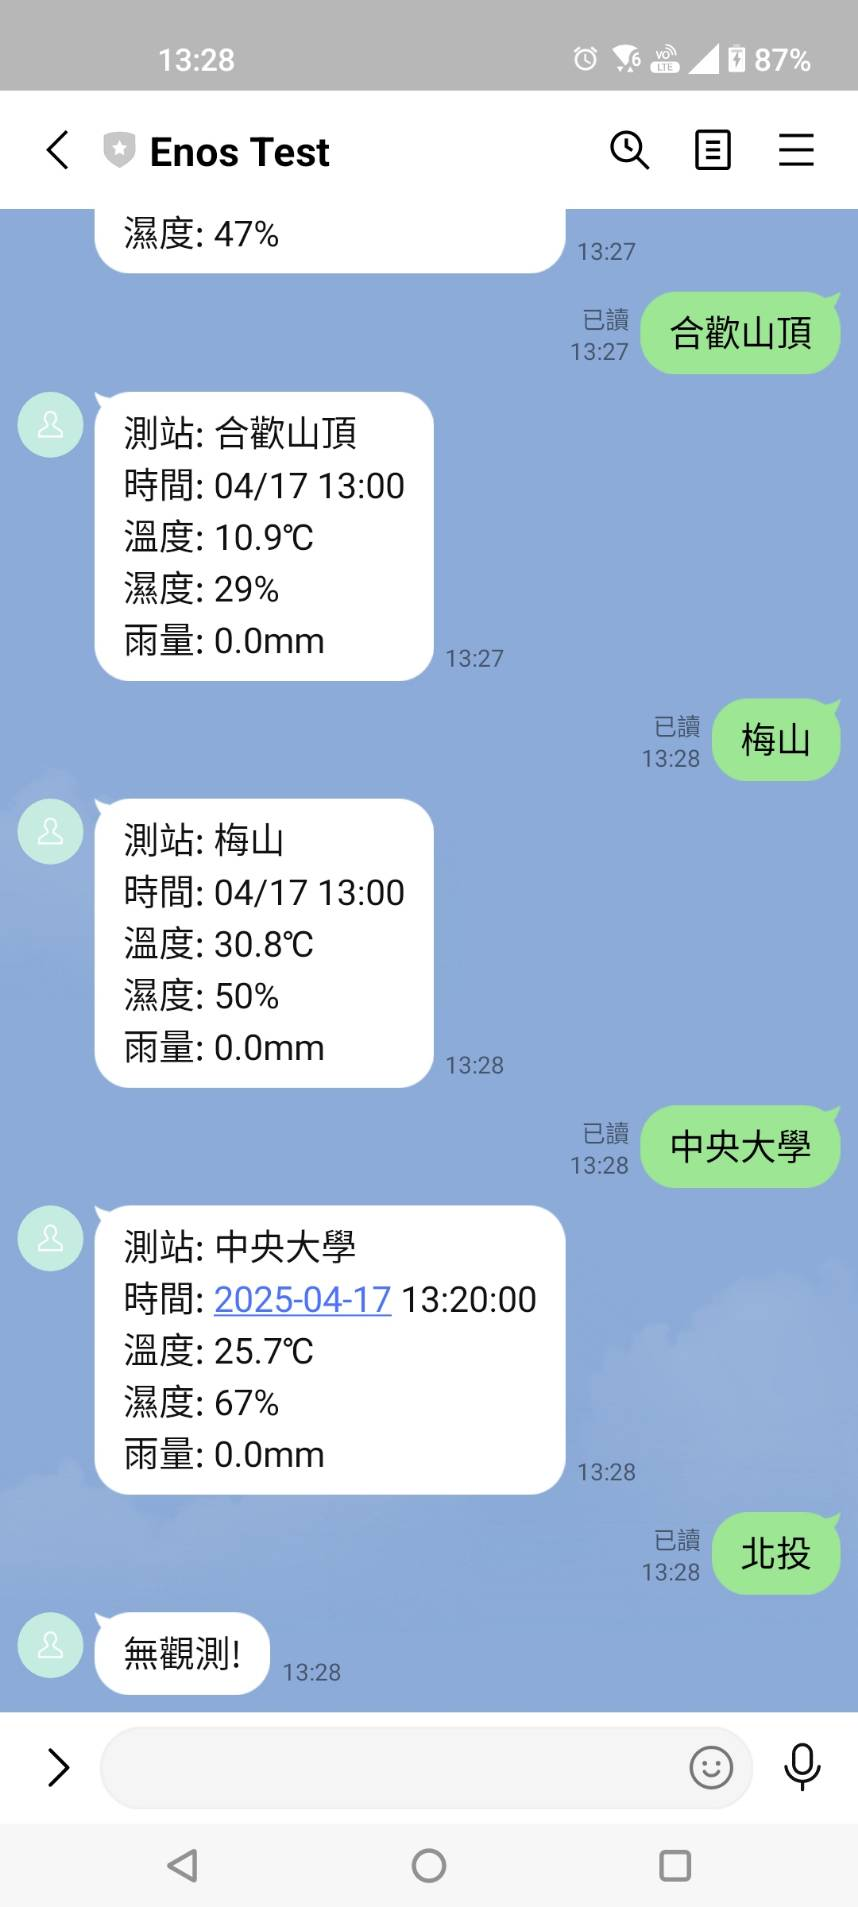
" width="120" alt="Weather LINE Bot 查詢照片">

## <div id="wap"><font color="blue">8. Weather API</font></div>

### <font color="brown">整合即時天氣查詢模組，製作天氣查詢 API</font>

<b>Reference Output</b>

<tt>
\> curl --location 'https://weapi.enadv.online' --header 'Content-Type: application/json' --data '{"site": "苗栗"}'

測站: 苗栗, 時間: 07/03 11:00, 溫度: 31.1℃, 濕度: 68.0%, 雨量: 0.0mm
</tt>

<b>Hints</b>

<tt>
<ol>
    <li>refer to the usage of <font color="green">Flask</font> in LINE Bot
</ol>
</tt>

## <div id="con"><font color="blue">9. Configurable Code Design</font></div>

### <font color="brown">查詢天氣 LINE Bot 能夠彈性指定各種 Keys</font>

<b>Hints</b>

<ol>
    <tt>
    <li><font color="green">dotenv</font> ft. INI<br>
        <br>
        <b>CONFIGURATION FILE NAME: <font color="blue">.env</font></b><br>
        <br>
        YOUR_KEY=aaabbbcccddd<br>
        YOUR_...=...<br>
        <br>
        <b>USAGE</b><br>
        <br>
        !pip install python-dotenv<br>
        <br>
        import os<br>
        from dotenv import load_dotenv<br>
        load_dotenv()<br>
        key = os.environ.get('YOUR_KEY')<br>
        <br>
    <li><font color="green">json</font> ft. JSON<br>
        <br>
        <b>CONFIGURATION FILE NAME: <font color="blue">env.json</font></b><br>
        <br>
        {<br>
        &nbsp;&nbsp;&nbsp; "YOUR_KEY": "aaabbbcccddd",<br>
        &nbsp;&nbsp;&nbsp; "YOUR_...": "..."<br>
        }<br>
        <br>
        <b>USAGE</b><br>
        <br>
        import json<br>
        with open('env.json') as f:<br>
        &nbsp;&nbsp;&nbsp; env = json.load(f)<br>
        key = env.get('YOUR_KEY')<br>
        <br>
    <li><font color="green">module</font> ft. Python<br>
        <br>
    <li><font color="green">default value design</font><br>
    </tt>
</ol>